<a href="https://colab.research.google.com/github/hilmikh/BBCA-Volume-Analysis/blob/main/BBCA_Volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Importing Libraries

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

In [ ]:
bbca = yf.download('BBCA.JK', start = '2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
bbca

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+07:00,1010.0,1010.0,965.0,1010.0,842.430725,77812500.0
2010-01-05 00:00:00+07:00,1020.0,1020.0,990.0,1020.0,850.771362,44442500.0
2010-01-06 00:00:00+07:00,990.0,1020.0,990.0,990.0,825.748779,27782500.0
2010-01-07 00:00:00+07:00,995.0,995.0,965.0,995.0,829.919250,38632500.0
2010-01-08 00:00:00+07:00,970.0,995.0,970.0,970.0,809.066895,27427500.0
...,...,...,...,...,...,...
2022-10-17 00:00:00+07:00,8250.0,8300.0,8175.0,8250.0,8250.000000,56387500.0
2022-10-18 00:00:00+07:00,8275.0,8475.0,8250.0,8300.0,8300.000000,85665300.0
2022-10-19 00:00:00+07:00,8250.0,8350.0,8225.0,8275.0,8275.000000,66753500.0


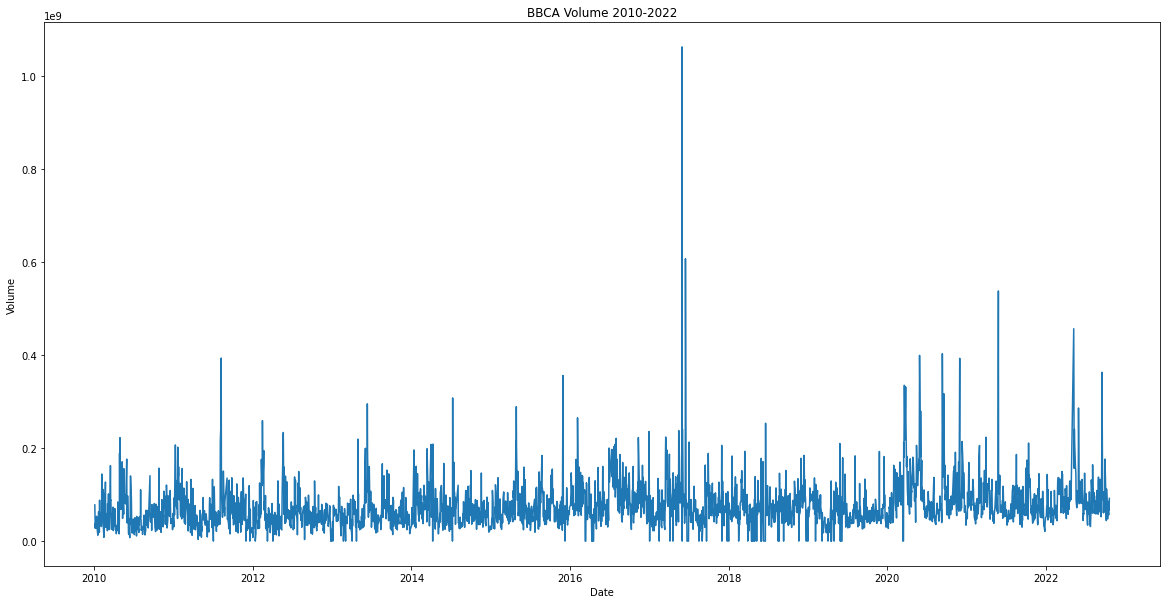

In [ ]:
  fig, ax = plt.subplots(figsize=(20, 10))
  sns.lineplot(data=bbca, x=bbca.index, y='Volume')
  ax.set_title(f'BBCA Volume 2010-2022')
  plt.show()

## Data Cleaning

### Quantile Scaling

In [ ]:
scaler = QuantileTransformer()

In [ ]:
scaled_bbca = scaler.fit_transform(bbca)
scaled_bbca = pd.DataFrame(scaled_bbca)
scaled_bbca = pd.DataFrame(scaled_bbca[5])
scaled_bbca.columns = ['Scaled Volume']

In [ ]:
scaled_bbca

,Scaled Volume
0,0.643511
1,0.241454
2,0.084086
3,0.176482
4,0.082119
...,...
3170,0.380915
3171,0.714792
3172,0.522850
3173,0.761267


### Feature Creation: Timeseries

In [ ]:
date_index = pd.DataFrame(bbca.index)

In [ ]:
scaled_bbca = scaled_bbca.assign(Date=date_index)
scaled_bbca = scaled_bbca.set_index('Date')

In [ ]:
def add_ts_feat(x): # add timeseries columns
  x['Day of Week'] = x.index.day_of_week
  x['Day of Month'] = x.index.day
  x['Month'] = x.index.month
  x['Quarter'] = x.index.quarter
  x['Year'] = x.index.year
  return x

In [ ]:
scaled_bbca = add_ts_feat(scaled_bbca)
scaled_bbca

,Scaled Volume,Day of Week,Day of Month,Month,Quarter,Year
Date,,,,,,
2010-01-04 00:00:00+07:00,0.643603,0,4,1,1,2010
2010-01-05 00:00:00+07:00,0.241462,1,5,1,1,2010
2010-01-06 00:00:00+07:00,0.084088,2,6,1,1,2010
2010-01-07 00:00:00+07:00,0.176496,3,7,1,1,2010
2010-01-08 00:00:00+07:00,0.082128,4,8,1,1,2010
...,...,...,...,...,...,...
2022-10-14 00:00:00+07:00,0.570700,4,14,10,4,2022
2022-10-17 00:00:00+07:00,0.381098,0,17,10,4,2022
2022-10-18 00:00:00+07:00,0.714905,1,18,10,4,2022


### Removing Zero Values

In [ ]:
scaled_bbca.min()

Scaled Volume       0.0
Day of Week         0.0
Day of Month        1.0
Month               1.0
Quarter             1.0
Year             2010.0
dtype: float64

In [ ]:
scaled_bbca = scaled_bbca[scaled_bbca['Scaled Volume']>0]

In [ ]:
scaled_bbca

,Scaled Volume,Day of Week,Day of Month,Month,Quarter,Year
Date,,,,,,
2010-01-04 00:00:00+07:00,0.643603,0,4,1,1,2010
2010-01-05 00:00:00+07:00,0.241462,1,5,1,1,2010
2010-01-06 00:00:00+07:00,0.084088,2,6,1,1,2010
2010-01-07 00:00:00+07:00,0.176496,3,7,1,1,2010
2010-01-08 00:00:00+07:00,0.082128,4,8,1,1,2010
...,...,...,...,...,...,...
2022-10-14 00:00:00+07:00,0.570700,4,14,10,4,2022
2022-10-17 00:00:00+07:00,0.381098,0,17,10,4,2022
2022-10-18 00:00:00+07:00,0.714905,1,18,10,4,2022


## Analysis

In [ ]:
bbca_train = scaled_bbca[scaled_bbca['Year']<2020]
bbca_test = scaled_bbca[scaled_bbca['Year']>=2020]

In [ ]:
bbca_test

,Scaled Volume,Day of Week,Day of Month,Month,Quarter,Year
Date,,,,,,
2020-01-02 00:00:00+07:00,0.296478,3,2,1,1,2020
2020-01-03 00:00:00+07:00,0.276043,4,3,1,1,2020
2020-01-06 00:00:00+07:00,0.081298,0,6,1,1,2020
2020-01-07 00:00:00+07:00,0.247107,1,7,1,1,2020
2020-01-08 00:00:00+07:00,0.352507,2,8,1,1,2020
...,...,...,...,...,...,...
2022-10-14 00:00:00+07:00,0.570700,4,14,10,4,2022
2022-10-17 00:00:00+07:00,0.381098,0,17,10,4,2022
2022-10-18 00:00:00+07:00,0.714905,1,18,10,4,2022


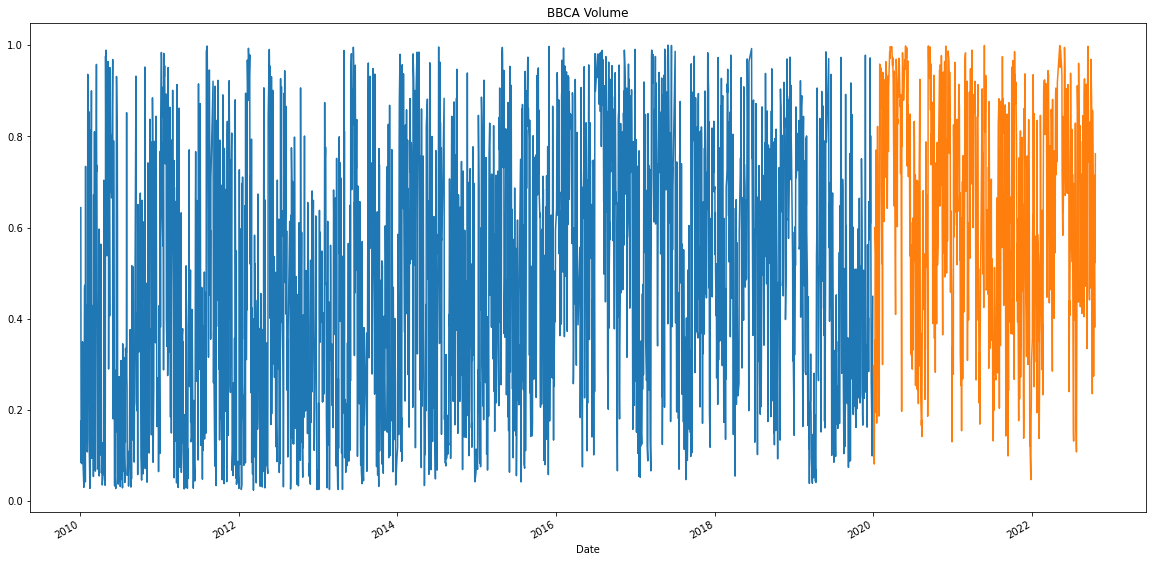

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
bbca_train['Scaled Volume'].plot()
bbca_test['Scaled Volume'].plot()
ax.set_title(f'BBCA Volume')
plt.show()

In [ ]:
def boxplot(data, time, title):
  fig, ax = plt.subplots(figsize=(20, 10))
  sns.boxplot(data=data, x=time, y='Scaled Volume')
  ax.set_title(title)
  plt.show()

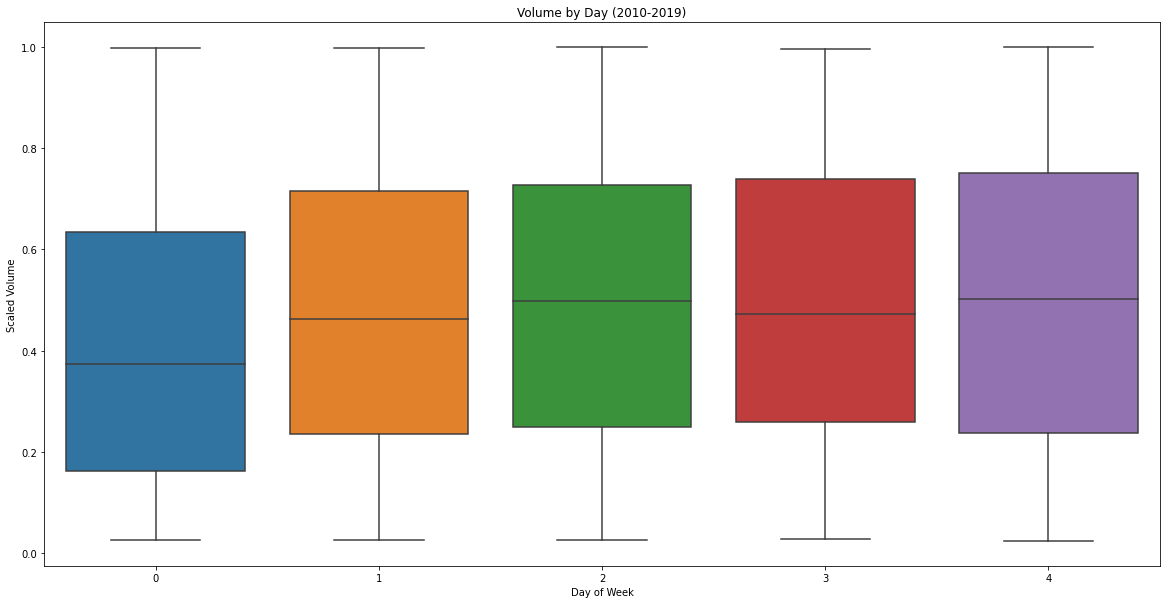

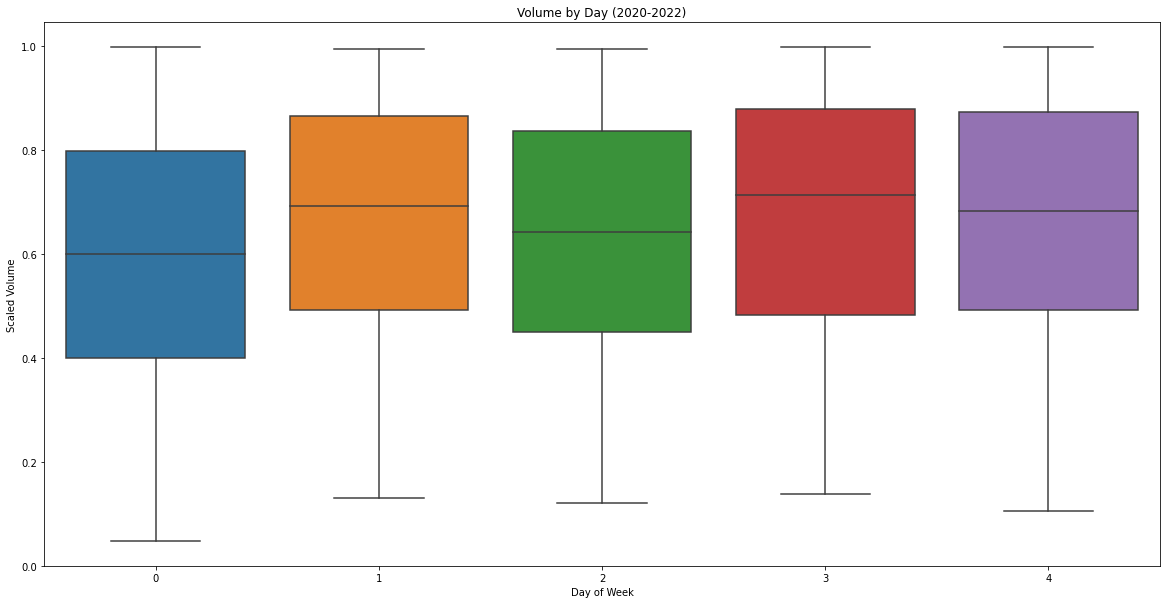

In [ ]:
boxplot(bbca_train, 'Day of Week', 'Volume by Day (2010-2019)')
boxplot(bbca_test, 'Day of Week', 'Volume by Day (2020-2022)')

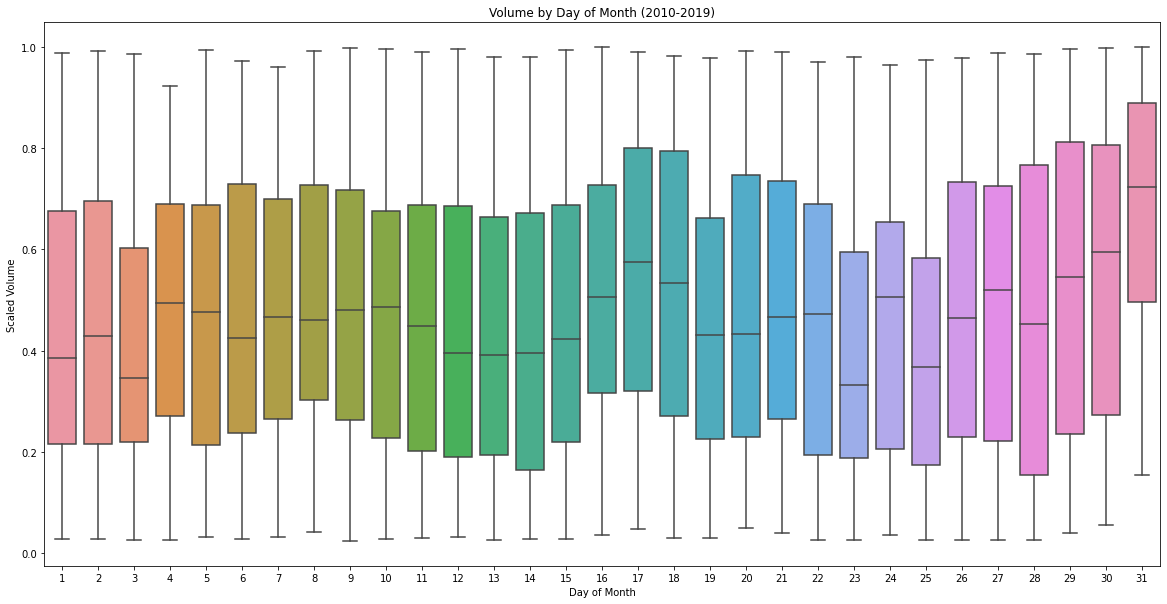

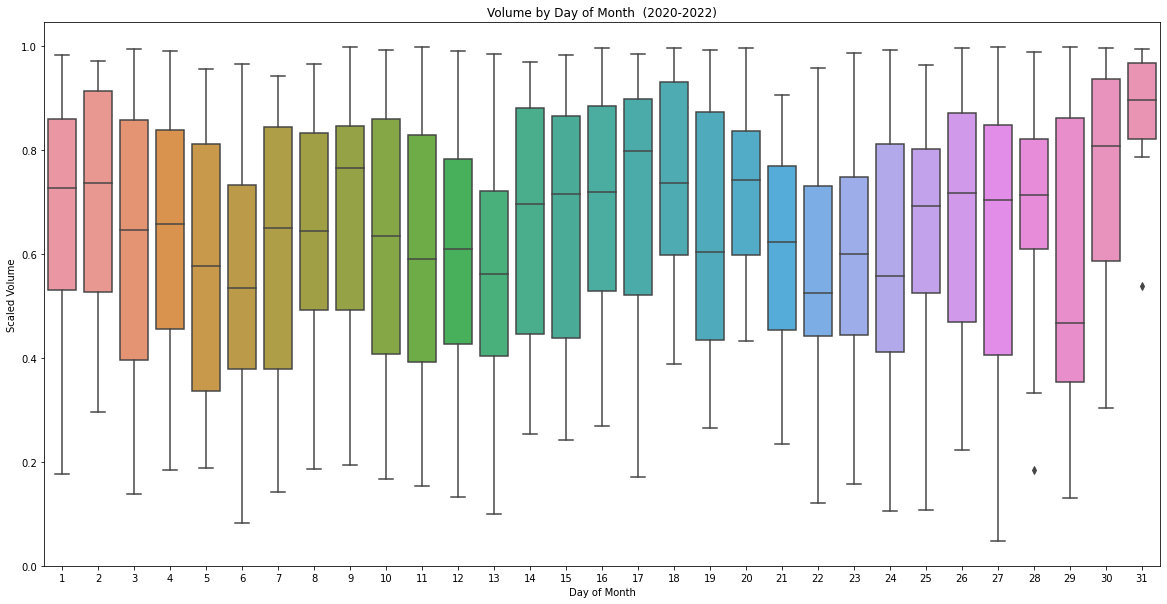

In [ ]:
boxplot(bbca_train, "Day of Month", 'Volume by Day of Month (2010-2019)')
boxplot(bbca_test, "Day of Month", 'Volume by Day of Month  (2020-2022)')

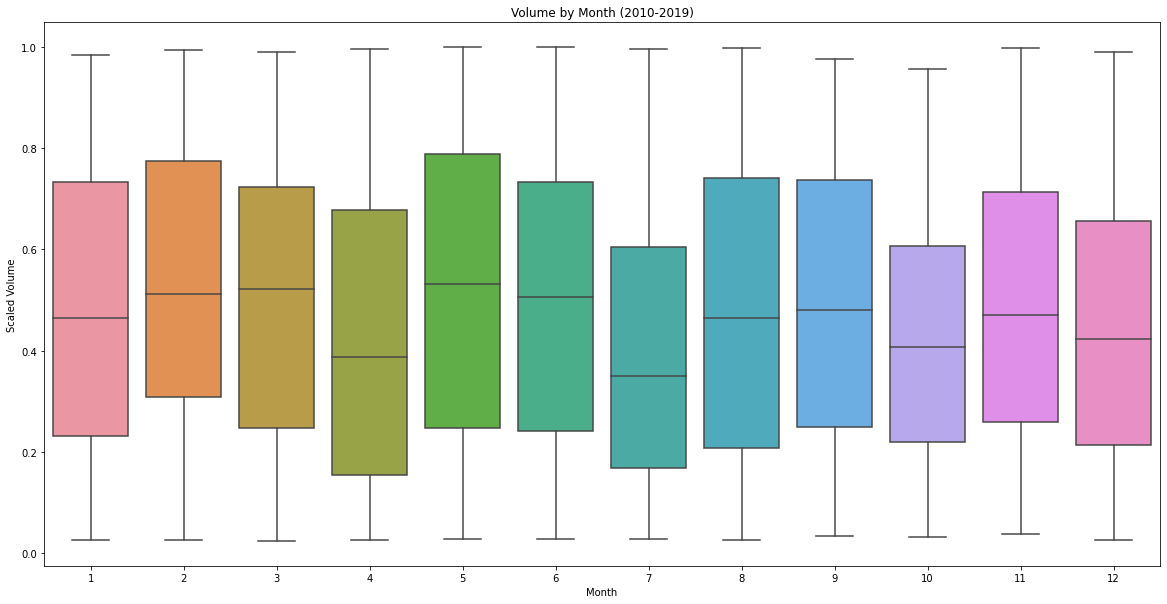

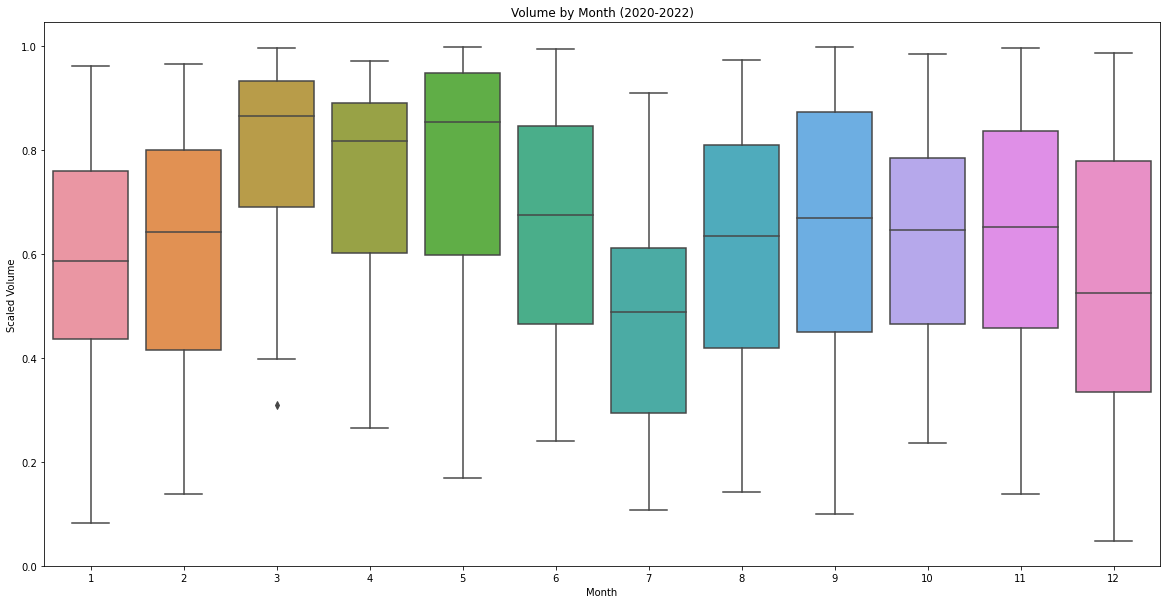

In [ ]:
boxplot(bbca_train, "Month", 'Volume by Month (2010-2019)')
boxplot(bbca_test, "Month", 'Volume by Month (2020-2022)')

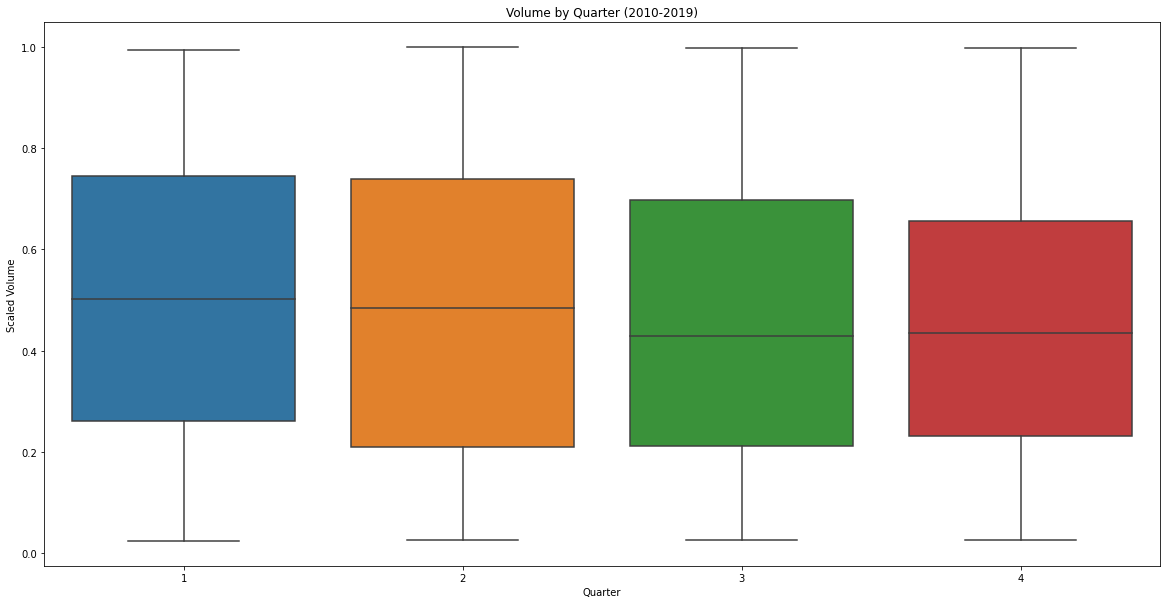

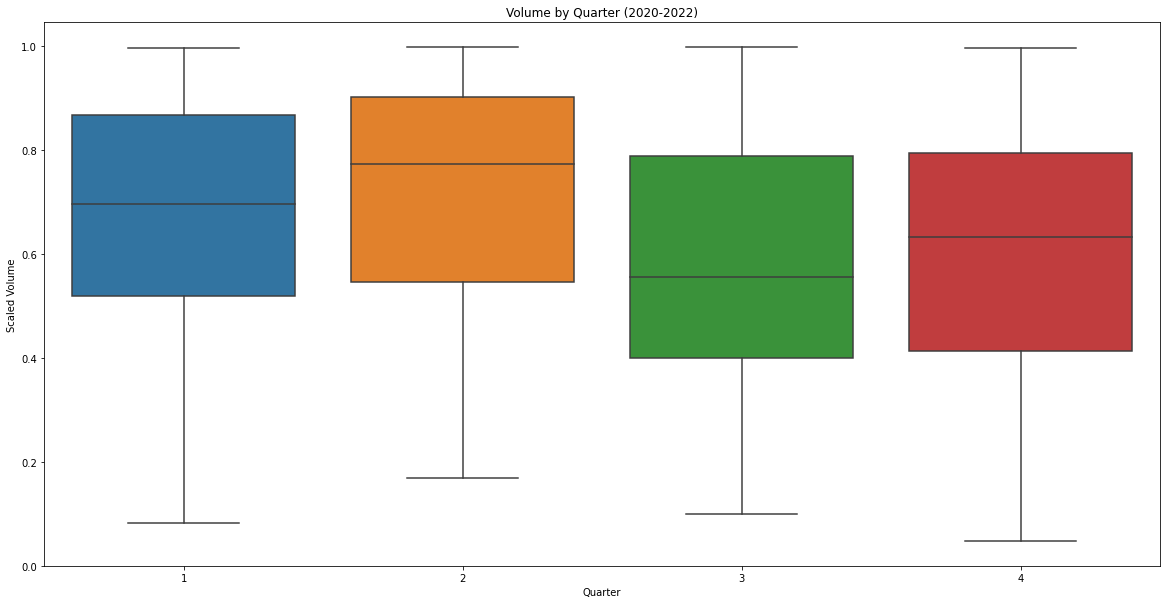

In [ ]:
boxplot(bbca_train, "Quarter", 'Volume by Quarter (2010-2019)')
boxplot(bbca_test, "Quarter", 'Volume by Quarter (2020-2022)')

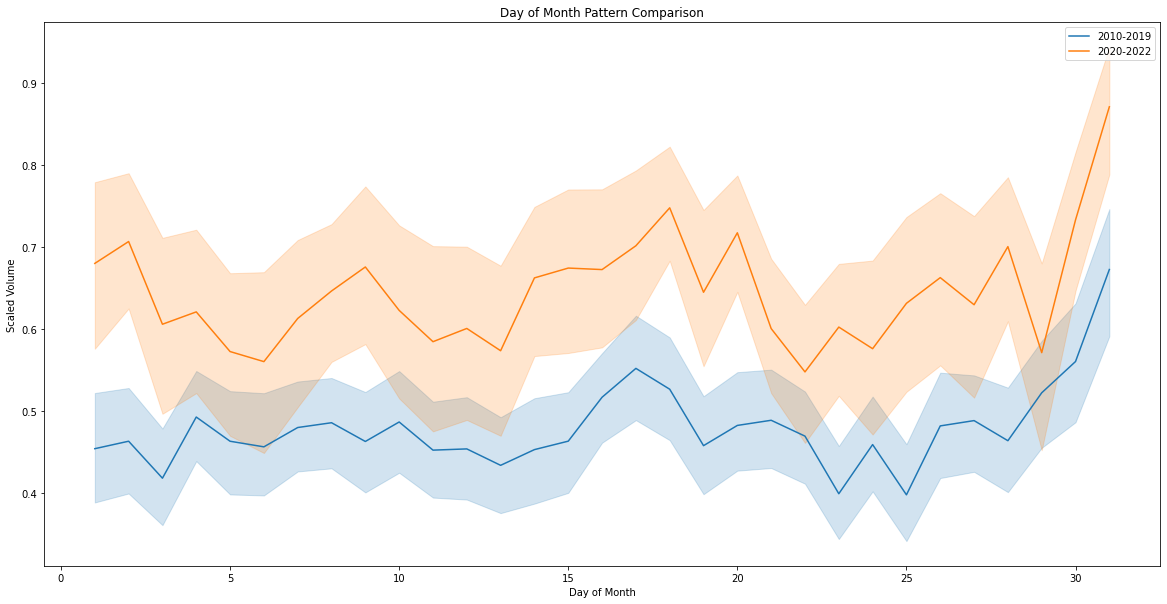

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=bbca_train, x='Day of Month', y='Scaled Volume')
sns.lineplot(data=bbca_test, x='Day of Month', y='Scaled Volume')
ax.legend(['2010-2019', '2020-2022'])
ax.set_title('Day of Month Pattern Comparison')
plt.show()

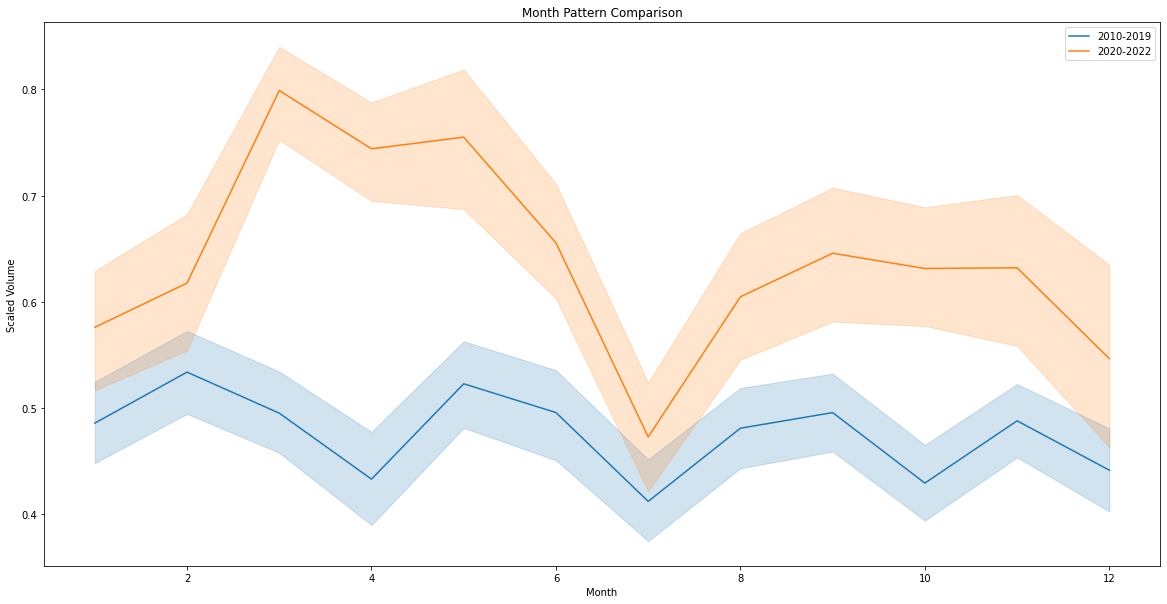

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=bbca_train, x='Month', y='Scaled Volume')
sns.lineplot(data=bbca_test, x='Month', y='Scaled Volume')
ax.legend(['2010-2019', '2020-2022'])
ax.set_title('Month Pattern Comparison')
plt.show()

**Mean Based on DOW**

In [ ]:
mean_train_DOW = {'Day of Week':['Mon','Tue','Wed','Thu','Fri'],
                  'Scaled Volume Mean':[]
                  }
for i in range(5): 
  mean_train_DOW['Scaled Volume Mean'].append(bbca_train.loc[bbca_train['Day of Week']==i,'Scaled Volume'].mean())

mean_train_DOW = pd.DataFrame(mean_train_DOW)
mean_train_DOW.sort_values(by=['Scaled Volume Mean'], ascending=False)

,Day of Week,Scaled Volume Mean
4,Fri,0.502717
2,Wed,0.497949
3,Thu,0.472887
1,Tue,0.462028
0,Mon,0.373816


In [ ]:
mean_test_DOW = {'Day of Week':['Mon','Tue','Wed','Thu','Fri'],
                  'Scaled Volume Mean':[]
                  }
for i in range(5): 
  mean_test_DOW['Scaled Volume Mean'].append(bbca_test.loc[bbca_test['Day of Week']==i,'Scaled Volume'].mean())

mean_test_DOW = pd.DataFrame(mean_test_DOW)
mean_test_DOW.sort_values(by=['Scaled Volume Mean'], ascending=False)

,Day of Week,Scaled Volume Mean
3,Thu,0.714081
1,Tue,0.692084
4,Fri,0.682273
2,Wed,0.641636
0,Mon,0.599840


**Median Based on DOM**

In [ ]:
median_train_DOM = {'Day of Month':[],
                  'Scaled Volume Median':[]
                  }
for i in range(1,32):
  median_train_DOM['Day of Month'].append(i)
  median_train_DOM['Scaled Volume Median'].append(bbca_train.loc[bbca_train['Day of Month']==i,'Scaled Volume'].median())

median_train_DOM = pd.DataFrame(median_train_DOM)
median_train_DOM.sort_values(by=['Scaled Volume Median'], ascending=False)

,Day of Month,Scaled Volume Median
30,31,0.723900
29,30,0.595389
16,17,0.575431
28,29,0.545482
17,18,0.533559
26,27,0.519999
15,16,0.506760
23,24,0.505321
3,4,0.494851
9,10,0.485990


In [ ]:
median_test_DOM = {'Day of Month':[],
                  'Scaled Volume Median':[]
                  }
for i in range(1,32):
  median_test_DOM['Day of Month'].append(i)
  median_test_DOM['Scaled Volume Median'].append(bbca_test.loc[bbca_test['Day of Month']==i,'Scaled Volume'].median())

median_test_DOM = pd.DataFrame(median_test_DOM)
median_test_DOM.sort_values(by=['Scaled Volume Median'], ascending=False)

,Day of Month,Scaled Volume Median
30,31,0.897408
29,30,0.808711
16,17,0.799470
8,9,0.765031
19,20,0.743546
17,18,0.737607
1,2,0.737056
0,1,0.726753
15,16,0.719576
25,26,0.717091


In [ ]:
median_train_Mon = {'Month':[],
                  'Scaled Volume Median':[]
                  }
for i in range(1,13):
  median_train_Mon['Month'].append(i)
  median_train_Mon['Scaled Volume Median'].append(bbca_train.loc[bbca_train['Month']==i,'Scaled Volume'].median())

median_train_Mon = pd.DataFrame(median_train_Mon)
median_train_Mon.sort_values(by=['Scaled Volume Median'], ascending=False)

,Month,Scaled Volume Median
4,5,0.531931
2,3,0.522607
1,2,0.511205
5,6,0.506505
8,9,0.479672
10,11,0.470784
0,1,0.465482
7,8,0.465208
11,12,0.422863
9,10,0.406902


In [ ]:
median_test_Mon = {'Month':[],
                  'Scaled Volume Median':[]
                  }
for i in range(1,13):
  median_test_Mon['Month'].append(i)
  median_test_Mon['Scaled Volume Median'].append(bbca_test.loc[bbca_test['Month']==i,'Scaled Volume'].median())

median_test_Mon = pd.DataFrame(median_test_Mon)
median_test_Mon.sort_values(by=['Scaled Volume Median'], ascending=False)

,Month,Scaled Volume Median
2,3,0.865988
4,5,0.854182
3,4,0.817181
5,6,0.674825
8,9,0.669425
10,11,0.652931
9,10,0.645744
1,2,0.641642
7,8,0.635605
0,1,0.586606
